In [ ]:
# Breast Cancer Wisconsin (Original) - Exploratory Data Analysis

This notebook performs exploratory data analysis (EDA) on the cleaned
Breast Cancer Wisconsin (Original) dataset. The main goals are:

- To understand the distribution of each cytological feature.
- To analyze how each feature relates to the malignancy label.
- To visualize the results using correlation plots and boxplots.
- To train a simple Random Forest classifier and inspect feature importances.



In [3]:
# Import basic packages
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look nicer
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12

# Set path to the cleaned CSV file
DATA_PATH = "/Users/shijietang/Desktop/143project/Analysis/breast_cancer_wisconsin_original_cleaned.csv"

DATA_PATH




'/Users/shijietang/Desktop/143project/Analysis/breast_cancer_wisconsin_original_cleaned.csv'

In [4]:
# Load the dataset
df = pd.read_csv(DATA_PATH)

print(f"Data shape: {df.shape[0]} rows, {df.shape[1]} columns")
df.head()


Data shape: 675 rows, 11 columns


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Diagnosis,Is_Malignant
0,5,1,1,1,2,1.0,3,1,1,2,0
1,5,4,4,5,7,10.0,3,2,1,2,0
2,3,1,1,1,2,2.0,3,1,1,2,0
3,6,8,8,1,3,4.0,3,7,1,2,0
4,4,1,1,3,2,1.0,3,1,1,2,0


In [5]:
print("Columns:", df.columns.tolist())
print("\nData types:\n", df.dtypes)

print("\nMissing values per column:\n")
print(df.isna().sum())

df.describe()


Columns: ['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Diagnosis', 'Is_Malignant']

Data types:
 Clump Thickness                  int64
Uniformity of Cell Size          int64
Uniformity of Cell Shape         int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                    float64
Bland Chromatin                  int64
Normal Nucleoli                  int64
Mitoses                          int64
Diagnosis                        int64
Is_Malignant                     int64
dtype: object

Missing values per column:

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses              

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Diagnosis,Is_Malignant
count,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000
mean,4.451852,3.146667,3.208889,2.848889,3.229630,3.537778,3.442963,2.885926,1.607407,2.699259,0.349630
std,2.820859,3.055005,2.976552,2.875917,2.208497,3.637871,2.453894,3.065607,1.741006,0.954413,0.477207
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000,1.000000


In [6]:
counts = df["Is_Malignant"].value_counts().sort_index()
ratios = df["Is_Malignant"].value_counts(normalize=True).sort_index()

print("Class distribution for Is_Malignant:")
for c in counts.index:
    label = "Benign (0)" if c == 0 else "Malignant (1)"
    print(f"{label}: {counts[c]} samples ({ratios[c] * 100:.2f}%)")


Class distribution for Is_Malignant:
Benign (0): 439 samples (65.04%)
Malignant (1): 236 samples (34.96%)


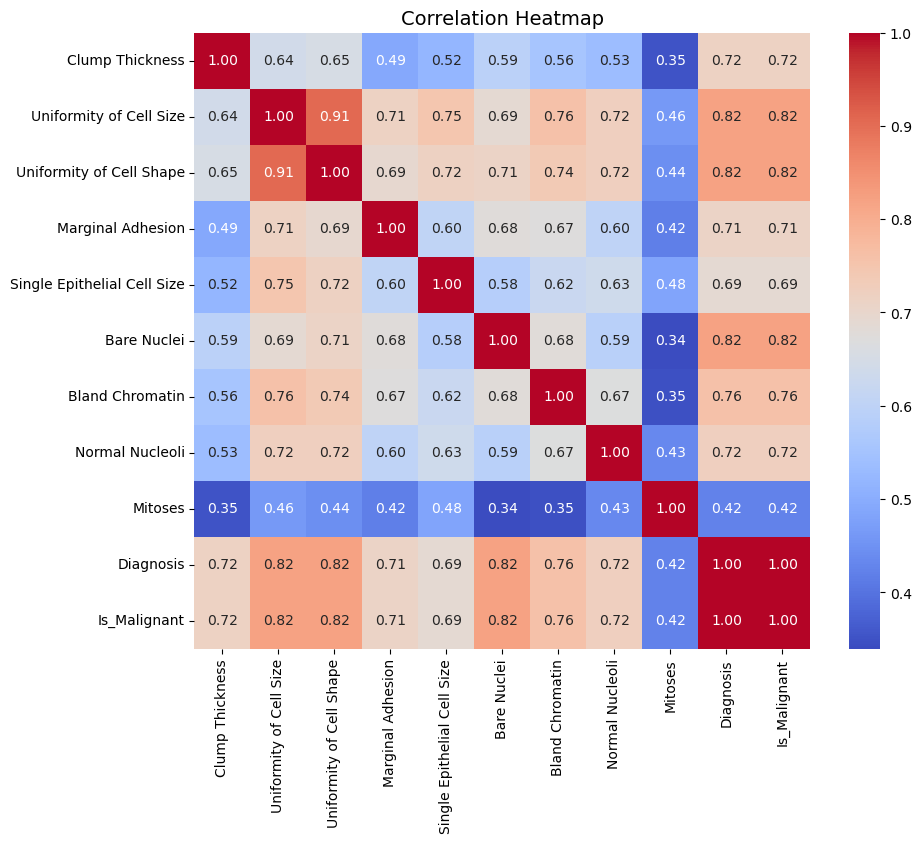

In [7]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()


In [8]:
corr_with_target = df[numeric_cols].corr()["Is_Malignant"].sort_values(ascending=False)
corr_with_target


Is_Malignant                   1.000000
Diagnosis                      1.000000
Uniformity of Cell Shape       0.820688
Uniformity of Cell Size        0.820663
Bare Nuclei                    0.820533
Bland Chromatin                0.758252
Normal Nucleoli                0.722020
Clump Thickness                0.715714
Marginal Adhesion              0.710985
Single Epithelial Cell Size    0.689544
Mitoses                        0.424399
Name: Is_Malignant, dtype: float64

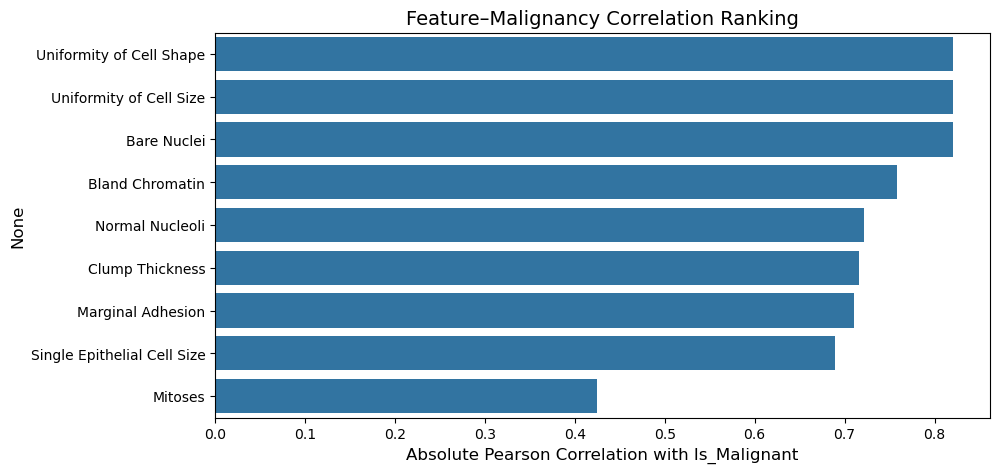

In [9]:
# Remove the target & original diagnosis code from feature ranking
corr_features_only = corr_with_target.drop(["Is_Malignant", "Diagnosis"])

plt.figure(figsize=(10, 5))
sns.barplot(x=corr_features_only.abs(), y=corr_features_only.index)
plt.xlabel("Absolute Pearson Correlation with Is_Malignant")
plt.title("Feature–Malignancy Correlation Ranking")
plt.show()


In [10]:
df_plot = df.copy()
df_plot["Diagnosis_Label"] = df_plot["Is_Malignant"].map({0: "Benign (0)", 1: "Malignant (1)"})

features = [col for col in numeric_cols if col not in ["Is_Malignant", "Diagnosis"]]
features


['Clump Thickness',
 'Uniformity of Cell Size',
 'Uniformity of Cell Shape',
 'Marginal Adhesion',
 'Single Epithelial Cell Size',
 'Bare Nuclei',
 'Bland Chromatin',
 'Normal Nucleoli',
 'Mitoses']

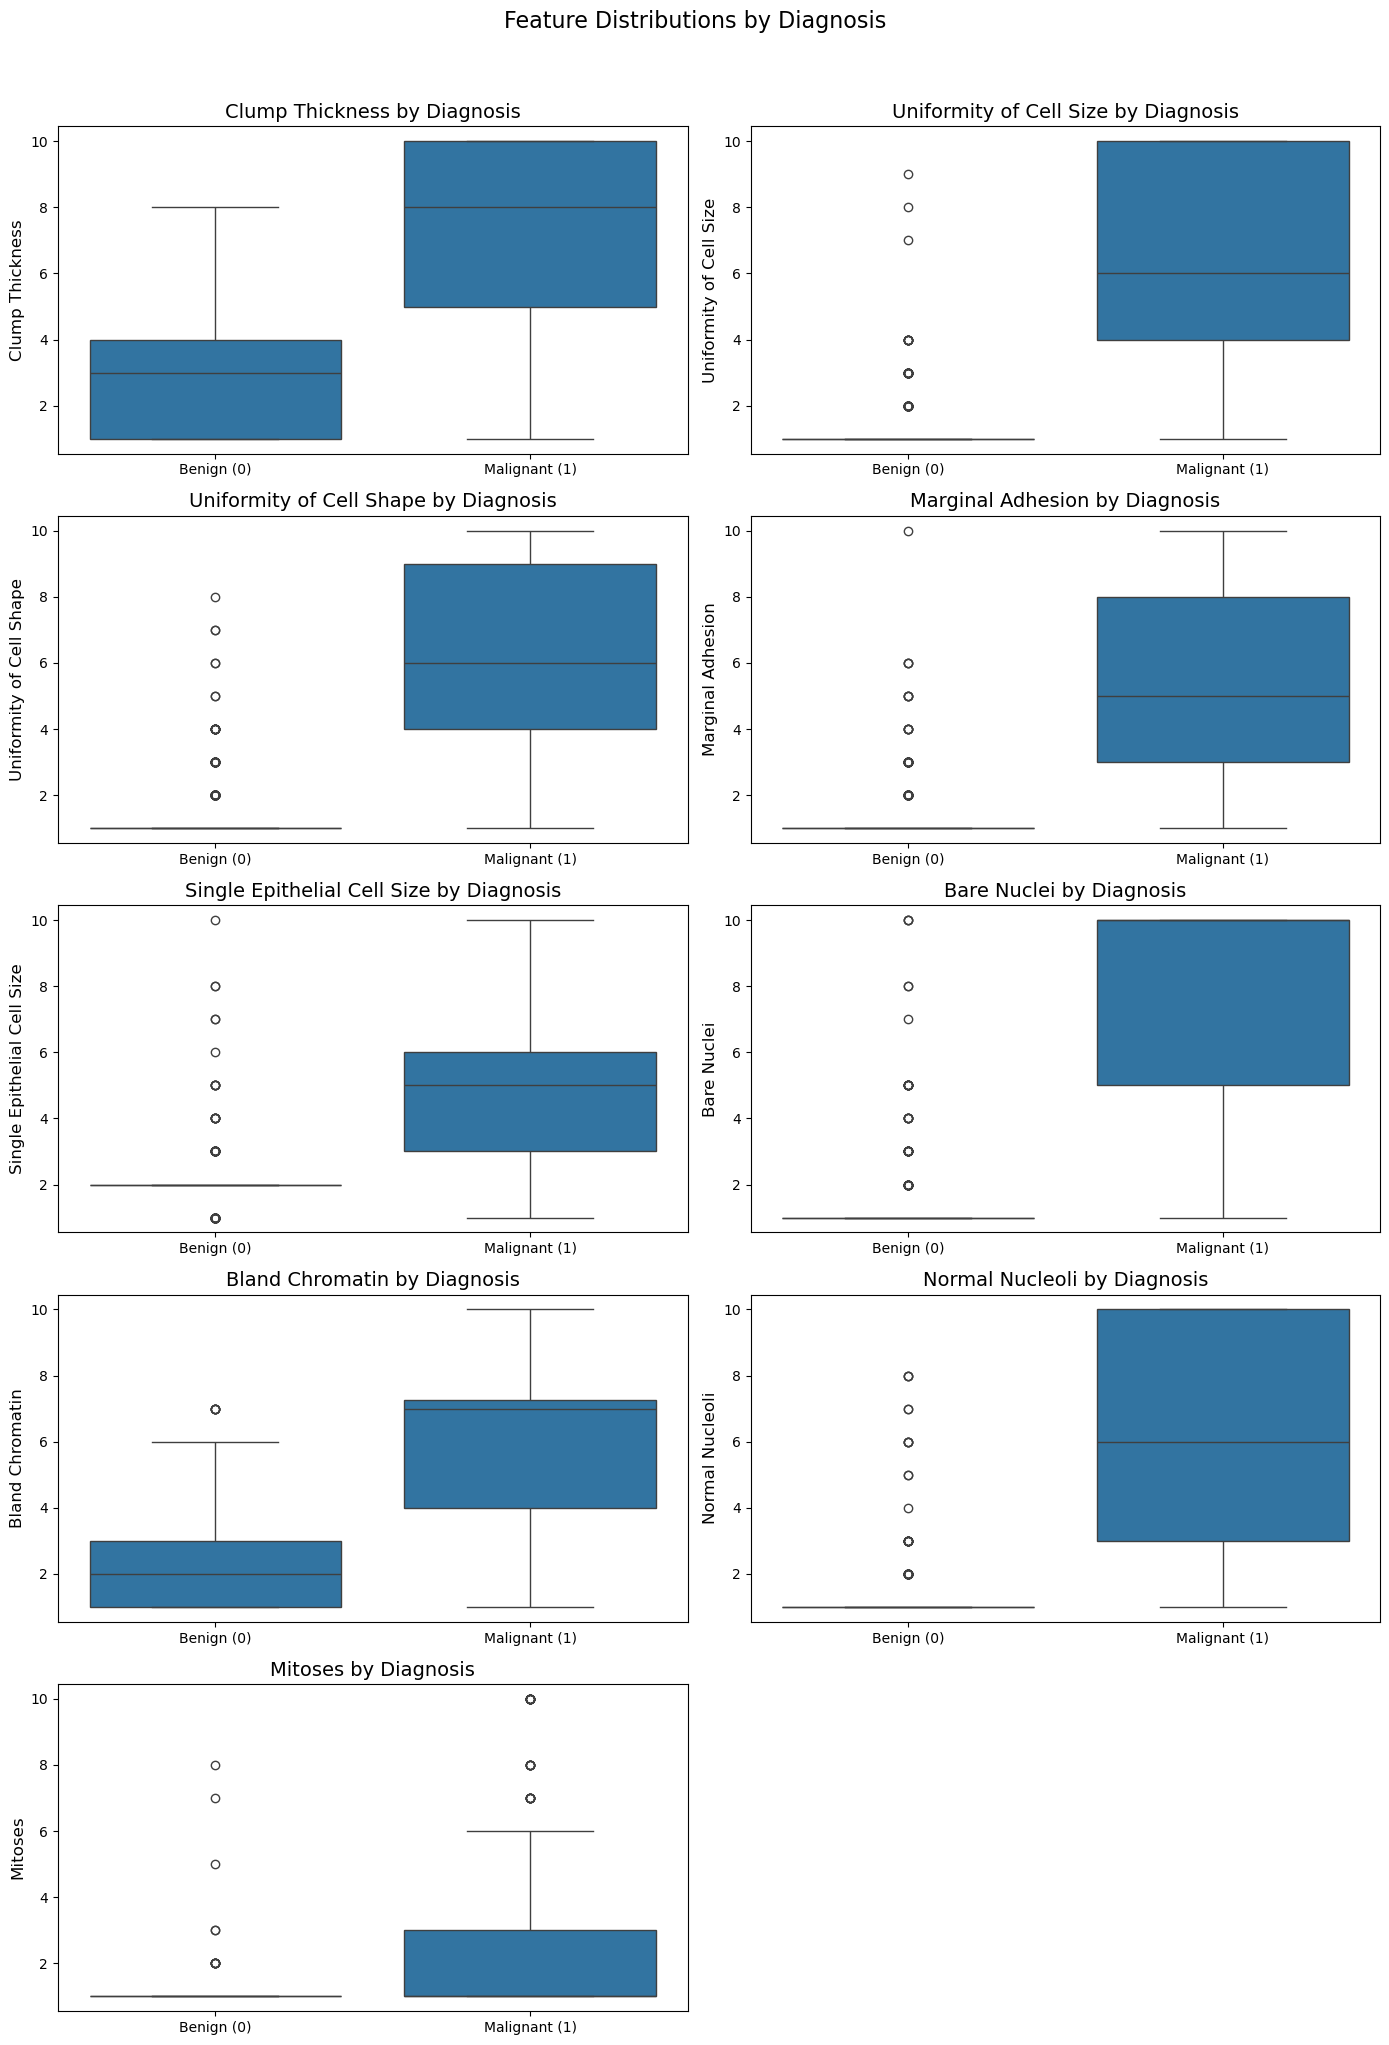

In [11]:
# Multi-panel boxplots
n_features = len(features)
n_cols = 2
n_rows = int(np.ceil(n_features / n_cols))

plt.figure(figsize=(14, 4 * n_rows))

for i, feature in enumerate(features, start=1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=df_plot, x="Diagnosis_Label", y=feature)
    plt.title(f"{feature} by Diagnosis")
    plt.xlabel("")
    plt.ylabel(feature)

plt.suptitle("Feature Distributions by Diagnosis", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


In [12]:
means = df.groupby("Is_Malignant")[features].mean()
means


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
Is_Malignant,,,,,,,,,
0,2.972665,1.309795,1.419134,1.350797,2.113895,1.350797,2.079727,1.264237,1.066059
1,7.203390,6.563559,6.538136,5.635593,5.305085,7.605932,5.978814,5.902542,2.614407


In [13]:
(means.loc[1] - means.loc[0]).sort_values(ascending=False)


Bare Nuclei                    6.255135
Uniformity of Cell Size        5.253764
Uniformity of Cell Shape       5.119001
Normal Nucleoli                4.638305
Marginal Adhesion              4.284796
Clump Thickness                4.230725
Bland Chromatin                3.899087
Single Epithelial Cell Size    3.191190
Mitoses                        1.548348
dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report

X = df[features].values
y = df["Is_Malignant"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

rf = RandomForestClassifier(
    n_estimators=200,
    class_weight="balanced",
    random_state=42,
)

rf.fit(X_train, y_train)

y_prob = rf.predict_proba(X_test)[:, 1]
y_pred = rf.predict(X_test)

print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


ROC-AUC: 0.994771660264618

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       132
           1       0.96      0.93      0.94        71

    accuracy                           0.96       203
   macro avg       0.96      0.95      0.96       203
weighted avg       0.96      0.96      0.96       203



In [15]:
importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
importances


Uniformity of Cell Size        0.354379
Uniformity of Cell Shape       0.225554
Bare Nuclei                    0.135997
Single Epithelial Cell Size    0.088600
Normal Nucleoli                0.066054
Bland Chromatin                0.050582
Clump Thickness                0.044595
Marginal Adhesion              0.024356
Mitoses                        0.009884
dtype: float64

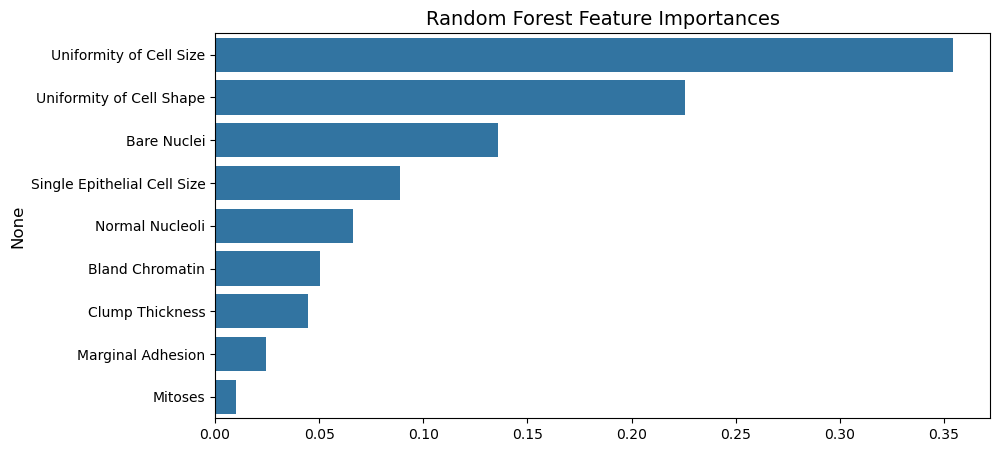

In [16]:
plt.figure(figsize=(10, 5))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Random Forest Feature Importances")
plt.show()
